# Python project for beginners- Analyze Diwali sales data to improve customer experience and sales

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [8]:
Diwali_data = pd.read_csv('Diwali Sales Data.csv', encoding = 'unicode_escape')

In [11]:
Diwali_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [13]:
Diwali_data.sample(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
9633,1004682,Vishakha,P00364842,F,26-35,34,1,Delhi,Central,Construction,Household items,4,3862.0,NaN,NaN
10556,1001099,Dominguez,P00005142,F,26-35,32,1,Maharashtra,Western,Aviation,Household items,1,2320.0,NaN,NaN
2593,1004899,Wasserman,P00121342,M,26-35,35,1,Delhi,Central,Banking,Books,3,13183.0,NaN,NaN
6222,1003385,Donovan,P00182242,M,26-35,26,0,Madhya Pradesh,Central,Hospitality,Electronics & Gadgets,2,7906.0,NaN,NaN
1621,1003436,Zettner,P00224242,M,36-45,37,1,Uttarakhand,Central,Govt,Furniture,3,15944.0,NaN,NaN
5273,1005153,Ivan,P00313242,F,26-35,30,1,Madhya Pradesh,Central,Chemical,Clothing & Apparel,3,8576.0,NaN,NaN
7525,1004323,Ed,P00028442,F,18-25,23,0,Uttarakhand,Central,IT Sector,Clothing & Apparel,3,6913.0,NaN,NaN
10069,1000760,Barchas,P00068442,F,55+,76,0,Delhi,Central,Hospitality,Pet Care,4,3455.0,NaN,NaN
4324,1004048,Karl,P00170942,M,36-45,39,0,Karnataka,Southern,Lawyer,Electronics & Gadgets,3,9912.0,NaN,NaN
5764,1002457,Latchford,P00089142,F,26-35,27,0,Andhra Pradesh,Southern,Automobile,Electronics & Gadgets,1,8066.0,NaN,NaN


In [25]:
Diwali_data.drop(columns = ['Status','unnamed1'], inplace = True)
Diwali_data

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


In [42]:
pd.isnull(Diwali_data).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [39]:
Diwali_data.dropna(inplace = True)

In [43]:
Diwali_data['Amount'] = Diwali_data['Amount'].astype('int')

# Exploratory Data Analysis

In [44]:
Diwali_data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

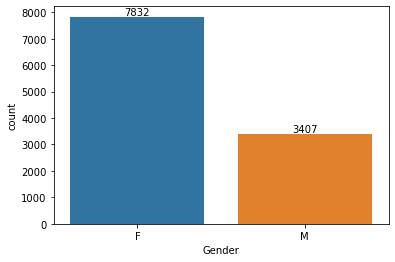

In [50]:
# plotting a bar chart for Gender and it's count

ax = sns.countplot(x = 'Gender',data = Diwali_data)

for bars in ax.containers:
    ax.bar_label(bars)

From above graphs we can see that most of the buyers are females 

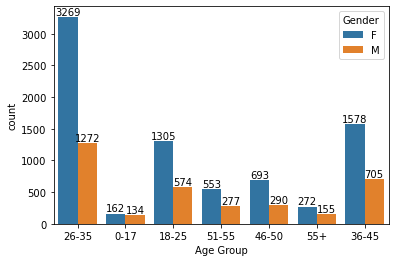

In [53]:
ax1 = sns.countplot(data = Diwali_data, x= 'Age Group', hue = 'Gender')

for bars in ax1.containers:
    ax1.bar_label(bars)

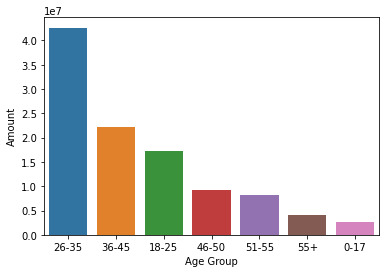

In [62]:

sales_age = Diwali_data.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.barplot( x = 'Age Group', y = 'Amount', data = sales_age);


From above graphs we can see that most of the buyers are of age group between 26-35 yrs female

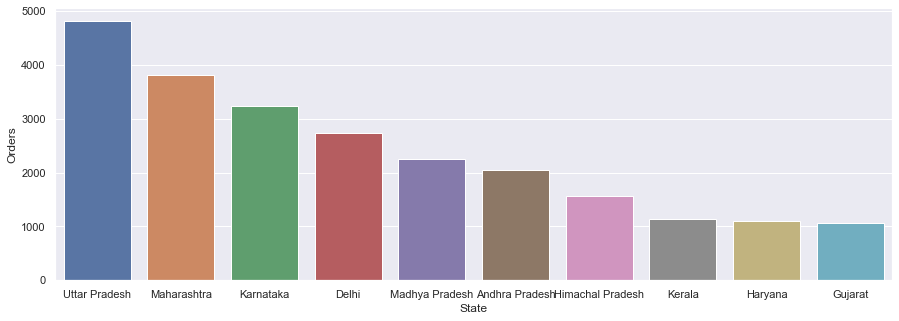

In [63]:
sales_by_state = Diwali_data.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)


sns.set(rc = {'figure.figsize':(15,5)})

sns.barplot( x= 'State',y ='Orders', data = sales_by_state);

From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

In [64]:
Diwali_data

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


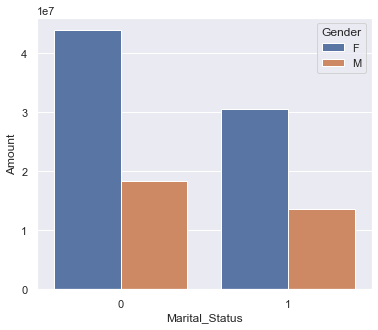

In [72]:
sales_marital_status = Diwali_data.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender');

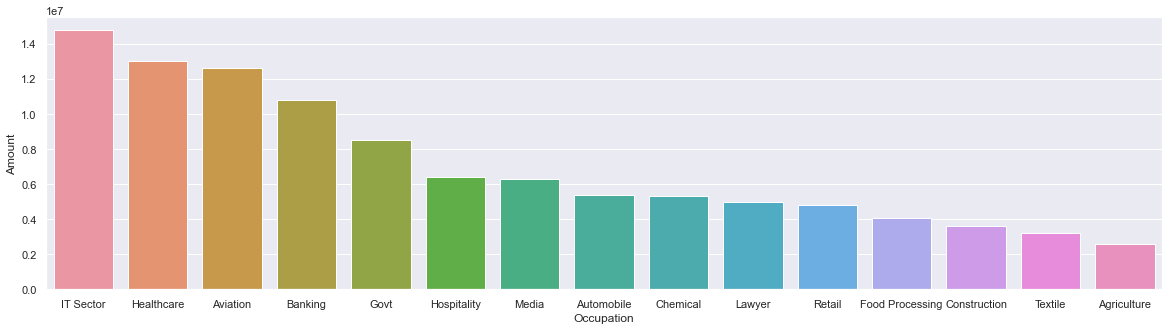

In [80]:
sales_occupations = Diwali_data.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_occupations, x = 'Occupation',y= 'Amount');

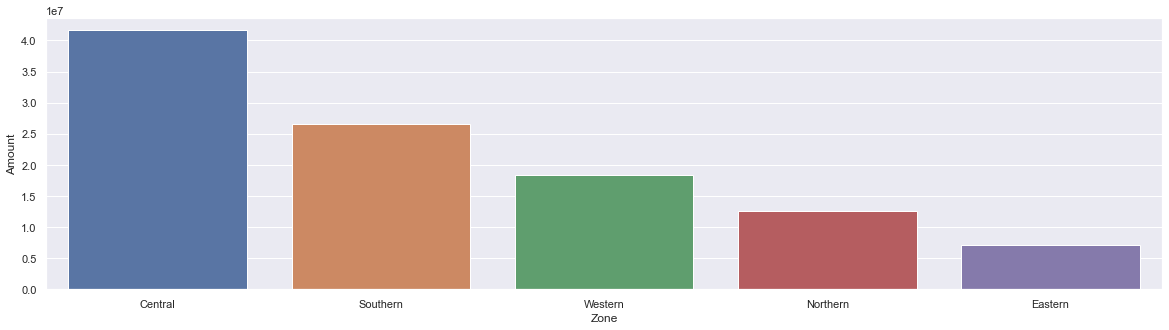

In [82]:
salesBy_Zone = Diwali_data.groupby(['Zone'],as_index = False )['Amount'].sum().sort_values(by = 'Amount', ascending  = False)

sns.barplot(x = 'Zone',y = 'Amount', data = salesBy_Zone);

We can see that Number-1 selling zone is Central and on number-2 is Southern zone.

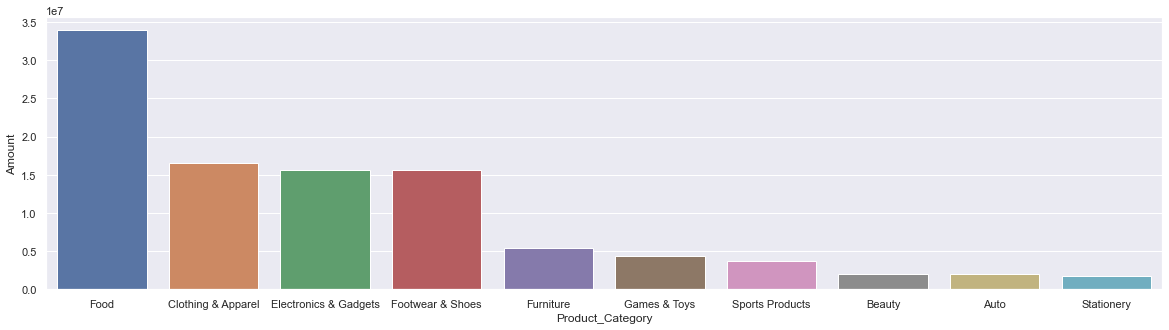

In [103]:

sales_state = Diwali_data.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount');




Conclusion:

Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category